In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd

from jupyter_dash import JupyterDash

#Import cleaned Dataset

effl_data = pd.read_csv('effluent.csv')
infl_data = pd.read_csv('influent_data.csv')

In [24]:
effl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67466 entries, 0 to 67465
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           67466 non-null  int64  
 1   TreatmentPlant       67466 non-null  object 
 2   SampleDateTime       67466 non-null  object 
 3   SampleValue          67466 non-null  float64
 4   NameDeterminandName  67466 non-null  object 
 5   UnitsName            67466 non-null  object 
 6   Latitude             67466 non-null  float64
 7   Longitude            67466 non-null  float64
 8   Year                 67466 non-null  int64  
 9   Month                67466 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 5.1+ MB


In [32]:
effl_plot = effl_data.drop(['Year', 'Unnamed: 0', 'Month'], axis = 1)

effl_plot.head()

,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude
0,Nuneaton STW,2015-08-13,1.90,metformin,micrograms per litre,52.559107,-1.508319
1,Nuneaton STW,2015-08-13,2.92,Biochemical Oxygen Demand,milligrammes per litre,52.559107,-1.508319
2,Nuneaton STW,2015-08-13,4.00,aluminium reactive,micrograms per litre,52.559107,-1.508319
3,Nuneaton STW,2015-08-13,3.99,total suspended solids,milligrammes per litre,52.559107,-1.508319
4,Nuneaton STW,2015-08-13,5.05,nickel dissolved,micrograms per litre,52.559107,-1.508319


In [33]:
effl_plot['Month_year'] = effl_data['Month'].astype(str) + effl_data['Year'].astype(str)

In [34]:
effl_plot.head()

,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude,Month_year
0,Nuneaton STW,2015-08-13,1.90,metformin,micrograms per litre,52.559107,-1.508319,82015
1,Nuneaton STW,2015-08-13,2.92,Biochemical Oxygen Demand,milligrammes per litre,52.559107,-1.508319,82015
2,Nuneaton STW,2015-08-13,4.00,aluminium reactive,micrograms per litre,52.559107,-1.508319,82015
3,Nuneaton STW,2015-08-13,3.99,total suspended solids,milligrammes per litre,52.559107,-1.508319,82015
4,Nuneaton STW,2015-08-13,5.05,nickel dissolved,micrograms per litre,52.559107,-1.508319,82015


In [49]:
effl_plot = effl_plot.sort_values(by = ['SampleDateTime'])

In [52]:
mark_key = list(effl_plot.Month_year.unique())

In [54]:
mark_values = list(range(1,36))

In [58]:
slider_marks = dict(zip(mark_key, mark_values))

In [60]:
effl_plot['SliderMarks'] = effl_plot['Month_year'].map(slider_marks)

In [61]:
effl_plot

,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude,Month_year,SliderMarks
18652,Kidderminster STW,2015-01-06,9.590,copper total,micrograms per litre,52.362425,-2.257971,12015,1
9173,Ambergate STW,2015-01-06,0.010,PFOS,micrograms per litre,53.060479,-1.472193,12015,1
9172,Ambergate STW,2015-01-06,0.010,trixylenyl phosphate,micrograms per litre,53.060479,-1.472193,12015,1
9171,Ambergate STW,2015-01-06,0.010,sulphide,milligrammes per litre,53.060479,-1.472193,12015,1
9170,Ambergate STW,2015-01-06,0.010,mercury total,micrograms per litre,53.060479,-1.472193,12015,1
...,...,...,...,...,...,...,...,...,...
51036,Rye Meads STW,2017-12-01,0.920,ranitidine,micrograms per litre,51.768679,0.015915,122017,35
51035,Rye Meads STW,2017-12-01,1.390,metformin,micrograms per litre,51.768679,0.015915,122017,35
51034,Rye Meads STW,2017-12-01,0.280,ciprofloxacin,micrograms per litre,51.768679,0.015915,122017,35
51032,Rye Meads STW,2017-12-01,0.398,azithromycin,micrograms per litre,51.768679,0.015915,122017,35


In [ ]:
#Groupby date(months, TreatmentPlants, NameDeterninandName, sample Value: mean and max

In [74]:
dt = {'1': "Jan", '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}

In [73]:
dt

{'1': 'Jan',
 '2': 'Feb',
 '3': 'Mar',
 '4': 'Apr',
 '5': 'May',
 '6': 'Jun',
 '7': 'Jul',
 '8': 'Aug',
 '9': 'Sep',
 '10': 'Oct',
 '11': 'Nov',
 '12': 'Dec'}

In [75]:
effl_df = effl_data.sort_values(by = ['SampleDateTime'])

In [76]:
effl_df

,Unnamed: 0,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude,Year,Month
18652,200006,Kidderminster STW,2015-01-06,9.590,copper total,micrograms per litre,52.362425,-2.257971,2015,1
9173,116339,Ambergate STW,2015-01-06,0.010,PFOS,micrograms per litre,53.060479,-1.472193,2015,1
9172,116338,Ambergate STW,2015-01-06,0.010,trixylenyl phosphate,micrograms per litre,53.060479,-1.472193,2015,1
9171,116337,Ambergate STW,2015-01-06,0.010,sulphide,milligrammes per litre,53.060479,-1.472193,2015,1
9170,116336,Ambergate STW,2015-01-06,0.010,mercury total,micrograms per litre,53.060479,-1.472193,2015,1
...,...,...,...,...,...,...,...,...,...,...
51036,473806,Rye Meads STW,2017-12-01,0.920,ranitidine,micrograms per litre,51.768679,0.015915,2017,12
51035,473805,Rye Meads STW,2017-12-01,1.390,metformin,micrograms per litre,51.768679,0.015915,2017,12
51034,473804,Rye Meads STW,2017-12-01,0.280,ciprofloxacin,micrograms per litre,51.768679,0.015915,2017,12
51032,473802,Rye Meads STW,2017-12-01,0.398,azithromycin,micrograms per litre,51.768679,0.015915,2017,12


In [82]:
 effl_plot['Month'] = effl_df['Month'].astype('str')

In [83]:
effl_plot['Year']=effl_df['Year'].astype('str')

In [84]:
effl_plot['Month'] = effl_plot['Month'].map(dt)

In [85]:
effl_plot

,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude,Month_year,SliderMarks,Month,Year
18652,Kidderminster STW,2015-01-06,9.590,copper total,micrograms per litre,52.362425,-2.257971,12015,1,Jan,2015
9173,Ambergate STW,2015-01-06,0.010,PFOS,micrograms per litre,53.060479,-1.472193,12015,1,Jan,2015
9172,Ambergate STW,2015-01-06,0.010,trixylenyl phosphate,micrograms per litre,53.060479,-1.472193,12015,1,Jan,2015
9171,Ambergate STW,2015-01-06,0.010,sulphide,milligrammes per litre,53.060479,-1.472193,12015,1,Jan,2015
9170,Ambergate STW,2015-01-06,0.010,mercury total,micrograms per litre,53.060479,-1.472193,12015,1,Jan,2015
...,...,...,...,...,...,...,...,...,...,...,...
51036,Rye Meads STW,2017-12-01,0.920,ranitidine,micrograms per litre,51.768679,0.015915,122017,35,Dec,2017
51035,Rye Meads STW,2017-12-01,1.390,metformin,micrograms per litre,51.768679,0.015915,122017,35,Dec,2017
51034,Rye Meads STW,2017-12-01,0.280,ciprofloxacin,micrograms per litre,51.768679,0.015915,122017,35,Dec,2017
51032,Rye Meads STW,2017-12-01,0.398,azithromycin,micrograms per litre,51.768679,0.015915,122017,35,Dec,2017


In [87]:
effl_plot['Month_year'] = effl_plot['Month']+ " " + effl_plot['Year']

In [88]:
effl_plot

,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude,Month_year,SliderMarks,Month,Year
18652,Kidderminster STW,2015-01-06,9.590,copper total,micrograms per litre,52.362425,-2.257971,Jan 2015,1,Jan,2015
9173,Ambergate STW,2015-01-06,0.010,PFOS,micrograms per litre,53.060479,-1.472193,Jan 2015,1,Jan,2015
9172,Ambergate STW,2015-01-06,0.010,trixylenyl phosphate,micrograms per litre,53.060479,-1.472193,Jan 2015,1,Jan,2015
9171,Ambergate STW,2015-01-06,0.010,sulphide,milligrammes per litre,53.060479,-1.472193,Jan 2015,1,Jan,2015
9170,Ambergate STW,2015-01-06,0.010,mercury total,micrograms per litre,53.060479,-1.472193,Jan 2015,1,Jan,2015
...,...,...,...,...,...,...,...,...,...,...,...
51036,Rye Meads STW,2017-12-01,0.920,ranitidine,micrograms per litre,51.768679,0.015915,Dec 2017,35,Dec,2017
51035,Rye Meads STW,2017-12-01,1.390,metformin,micrograms per litre,51.768679,0.015915,Dec 2017,35,Dec,2017
51034,Rye Meads STW,2017-12-01,0.280,ciprofloxacin,micrograms per litre,51.768679,0.015915,Dec 2017,35,Dec,2017
51032,Rye Meads STW,2017-12-01,0.398,azithromycin,micrograms per litre,51.768679,0.015915,Dec 2017,35,Dec,2017


In [89]:
x = effl_plot.SliderMarks.unique()

y = effl_plot.Month_year.unique()

In [90]:
marks = dict(zip(x, y))

In [99]:
keys = list(range(1, 36, 3))
keys

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34]

In [100]:
marking = {k: marks[k] for k in keys}

In [101]:
marking

{1: 'Jan 2015',
 4: 'Apr 2015',
 7: 'Jul 2015',
 10: 'Oct 2015',
 13: 'Jan 2016',
 16: 'Apr 2016',
 19: 'Jul 2016',
 22: 'Oct 2016',
 25: 'Jan 2017',
 28: 'Apr 2017',
 31: 'Jul 2017',
 34: 'Oct 2017'}

In [103]:
effl_plot = effl_plot.drop(['Year', 'Month'], axis = 1)

In [106]:
effl_plot['NameDeterminandName']=effl_plot['NameDeterminandName'].str.upper()

In [107]:
effl_plot

,TreatmentPlant,SampleDateTime,SampleValue,NameDeterminandName,UnitsName,Latitude,Longitude,Month_year,SliderMarks
18652,Kidderminster STW,2015-01-06,9.590,COPPER TOTAL,micrograms per litre,52.362425,-2.257971,Jan 2015,1
9173,Ambergate STW,2015-01-06,0.010,PFOS,micrograms per litre,53.060479,-1.472193,Jan 2015,1
9172,Ambergate STW,2015-01-06,0.010,TRIXYLENYL PHOSPHATE,micrograms per litre,53.060479,-1.472193,Jan 2015,1
9171,Ambergate STW,2015-01-06,0.010,SULPHIDE,milligrammes per litre,53.060479,-1.472193,Jan 2015,1
9170,Ambergate STW,2015-01-06,0.010,MERCURY TOTAL,micrograms per litre,53.060479,-1.472193,Jan 2015,1
...,...,...,...,...,...,...,...,...,...
51036,Rye Meads STW,2017-12-01,0.920,RANITIDINE,micrograms per litre,51.768679,0.015915,Dec 2017,35
51035,Rye Meads STW,2017-12-01,1.390,METFORMIN,micrograms per litre,51.768679,0.015915,Dec 2017,35
51034,Rye Meads STW,2017-12-01,0.280,CIPROFLOXACIN,micrograms per litre,51.768679,0.015915,Dec 2017,35
51032,Rye Meads STW,2017-12-01,0.398,AZITHROMYCIN,micrograms per litre,51.768679,0.015915,Dec 2017,35


In [108]:
effl_plot.to_csv('effluent_df.csv')

In [18]:
#Build app

#app = dash.Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width"}])
app = JupyterDash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width"}])


app.layout = html.Div([
    html.Div([
        html.Div([
            html.H3()
        ], 
            className="one-third column"),
        
        html.Div([
            html.H3("UK Sewage Treatment Quality", style={"margin-bottom": "0px", 'color': 'white'}),
            html.H6("Interactive Web Visualisation App", style={"margin-top": "0px", 'color': '#ff8a8a'})
        ], 
            className="one-half column", id="title"),
        
        html.Div([
            html.H3()
        ], 
            className="one-third column")       
      
    ], id="header", className="row flex-display", style={"margin-bottom": "25px"}),
    
    html.Div([
        html.Div([
            html.P('Select Parameter:', className='fix_label', style={'color': 'white'}),
            
            dcc.Dropdown(id='parameters',
                                  multi=False,
                                  clearable=True,
                                  value='Biochemical Oxygen Demand',
                                  placeholder='Select...',
                                  options=[{'label': c, 'value': c}
                                           for c in (effl_data['NameDeterminandName'].unique())], className='dcc_compon'),
        
        ], className="create_container five columns", id="cross-filter-options"),
        
        html.Div([
            html.P('Select Treatment Plants (5 max):', className='fix_label', style={'color': 'white'}),
            
            dcc.Dropdown(id='swt',
                                  multi=True,
                                  clearable=True,
                                  value='Nuneaton STW',
                                  placeholder='Select...',
                                  options=[{'label': c, 'value': c}
                                           for c in (effl_data['TreatmentPlant'].unique())], className='dcc_compon'),
        
        ], className="create_container six columns", id="cross-filter-options1")
    ])

])

app.run_server(mode='jupyterlab', port = 8050)

In [14]:
#app._terminate_server_for_port("localhost", 8050)

<AxesSubplot:xlabel='uwwLongitude', ylabel='uwwLatitude'>

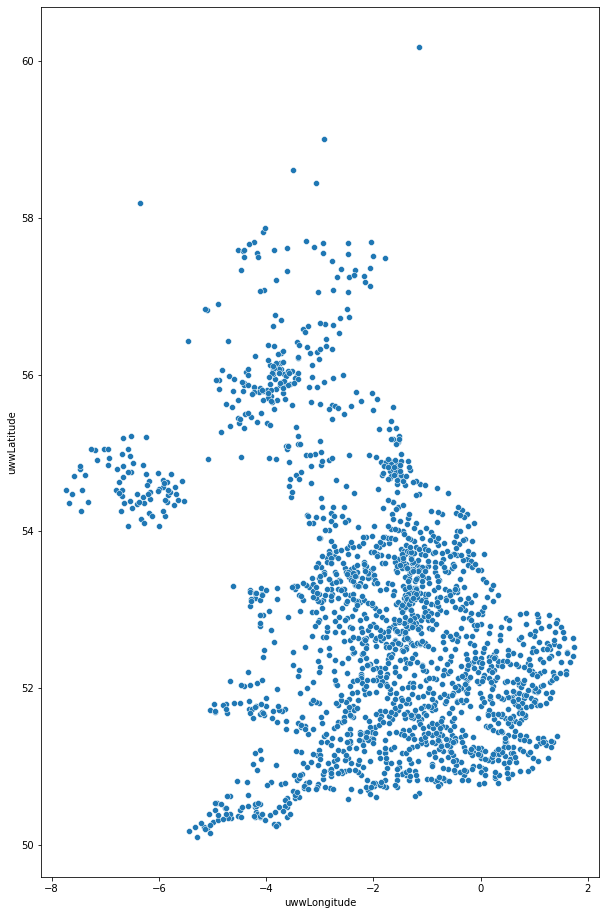

In [ ]:
fig_dims = (10,16)

fig, ax = plt.subplots(figsize = fig_dims)
sn.scatterplot(data = effl, x ='Longitude', y = 'Latitude', ax = ax)

In [ ]:
#clean string in column and change it to uppercase
location['uwwName'] = location['uwwName'].str.upper().str.replace("WWTP", "").str.replace("STW", "").str.replace("WWTW", "").str.replace("\xA0", "").str.replace("WWTP", "").str.replace(" ", "")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#location['uwwName'] = location['uwwName'].str.replace("WWTP", "")
#location['uwwName'] = location['uwwName'].str.replace("STW", "")
#location['uwwName'] = location['uwwName'].str.replace("\xa0", "")
#location['uwwName'] = location['uwwName'].str.title()

In [ ]:
#Check and Remove null calues
location.isnull().sum().sum()

3

In [ ]:
location = location.dropna()

In [ ]:
#location.to_csv('map_tp.csv')

In [ ]:
location = location.sort_values('uwwName')

In [ ]:
list(location.uwwLatitude)

[51.8258406,
 56.62291,
 51.85116013,
 52.40106044,
 51.65255524,
 51.65255524,
 57.07269,
 53.64540284,
 52.63276755,
 52.04221213,
 53.56555812,
 53.59205912,
 53.73729427,
 56.07334,
 52.63996186,
 52.20800996,
 52.36469307,
 53.30389347,
 51.24685784,
 51.26661959,
 57.23882,
 53.26033041,
 53.10761666,
 57.49957,
 55.78012,
 56.106669999999994,
 51.56202428,
 57.69106,
 55.41231292,
 51.07269825,
 52.73369321,
 53.10428191,
 53.59145825,
 52.98088308,
 51.15283331,
 53.41018471,
 56.148630000000004,
 52.34346603,
 52.46313692,
 51.58402072,
 56.621190000000006,
 53.06039514,
 55.32323485,
 54.42782771,
 51.16823177,
 51.77075588,
 51.70561723,
 51.17308929,
 55.2195,
 54.97396,
 54.2615,
 54.731,
 53.03570466,
 52.25670871,
 54.58315854,
 51.69526458,
 51.40045217,
 55.946740000000005,
 52.50351384,
 55.907819999999994,
 54.365,
 52.74516172,
 53.53215812,
 51.40612204,
 52.75997092,
 53.01250991,
 51.9350711,
 51.15338513,
 50.92841519,
 52.13373944,
 53.47095541,
 51.2773761,
 5

In [ ]:
#clean string in column and change it to uppercase
swt_data['TreatmentPlant'] = swt_data['TreatmentPlant'].str.upper().str.replace("STW", "").str.replace("-", "").str.replace(" ", "")

In [ ]:
swt_data.sort_values('TreatmentPlant')

,SampleDateTime,TreatmentPlant,SampleDateTime.1,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Year,Month
213548,2016-05-12,ABINGDON,2016-05-12,Treatment Effluent,0.0005,BDE28,micrograms per litre,Yes,2016,5
213515,2016-05-12,ABINGDON,2016-05-12,Treatment Effluent,26.0000,total oxidised nitrogen as N,milligrammes per litre,No,2016,5
213516,2016-05-12,ABINGDON,2016-05-12,Treatment Effluent,9.0000,Biochemical Oxygen Demand,milligrammes per litre,No,2016,5
213517,2016-05-12,ABINGDON,2016-05-12,Treatment Effluent,12.0000,Chemical Oxygen Demand,milligrammes per litre,No,2016,5
213518,2016-05-12,ABINGDON,2016-05-12,Treatment Effluent,1.0000,total phosphorus as P,milligrammes per litre,No,2016,5
...,...,...,...,...,...,...,...,...,...,...
541626,2018-08-05,YADDLETHORPE,2018-08-05,Treatment Effluent,42.5000,iron dissolved,micrograms per litre,No,2018,8
541625,2018-08-05,YADDLETHORPE,2018-08-05,Treatment Effluent,0.0010,mercury dissolved,micrograms per litre,Yes,2018,8
541624,2018-11-14,YADDLETHORPE,2018-11-14,Treatment Effluent,0.0005,BDE 99,micrograms per litre,Yes,2018,11
541630,2018-08-05,YADDLETHORPE,2018-08-05,Treatment Effluent,15.2000,aluminium reactive,micrograms per litre,No,2018,8


In [ ]:
#swt_data.to_csv('ukwri_cleaned.csv')

In [ ]:
#Extract names of sites from location data and edit the strings for consistency

sites = location.uwwName.unique()
s_names = []

for site in sites:
  site = site.replace(" ", "")
  
  if len(site) >= 9:
            site= site[:12]
  else:
    site = site
    
  s_names.append(site)

sites = list(sites)

s_names = list(s_names)

In [ ]:
type(sites)

list

In [ ]:
site_edited = dict(zip(sites, s_names))

In [ ]:
len(site_edited)

1860

In [ ]:
site_edited = dict(sorted(site_edited.items()))


In [ ]:
site_edited

{'ABERBAIDENBEHINDHOPYARDFARM': 'ABERBAIDENBE',
 'ABERFELDY': 'ABERFELDY',
 'ABERGAVENNY': 'ABERGAVENNY',
 'ABERYYTH': 'ABERYYTH',
 'ABINGDON': 'ABINGDON',
 'ABINGDON(OXON)': 'ABINGDON(OXO',
 'ABOYNE': 'ABOYNE',
 'ACKWORTH': 'ACKWORTH',
 'ACLE': 'ACLE',
 'ADPARADPARCEREDIGION': 'ADPARADPARCE',
 'ADWICK-LE-STREETANDCARCROFT': 'ADWICK-LE-ST',
 'AINSDALE': 'AINSDALE',
 'AIREDALE': 'AIREDALE',
 'AIRTH': 'AIRTH',
 'ALBRIGHTON': 'ALBRIGHTON',
 'ALCESTER': 'ALCESTER',
 'ALCONBURY': 'ALCONBURY',
 'ALDERLEYEDGE': 'ALDERLEYEDGE',
 'ALDERSHOT,ALDERSHOT,HANTS"': 'ALDERSHOT,AL',
 'ALDERSHOTMILITARY': 'ALDERSHOTMIL',
 'ALFORD': 'ALFORD',
 'ALFRETON': 'ALFRETON',
 'ALLANFEARN,INVERNESS': 'ALLANFEARN,I',
 'ALLERSS.T.W.': 'ALLERSS.T.W.',
 'ALLOA': 'ALLOA',
 'ALMONDSBURY': 'ALMONDSBURY',
 'ALNESS&INVERGORDON': 'ALNESS&INVER',
 'ALNWICK': 'ALNWICK',
 'ALRESFORD': 'ALRESFORD',
 'ALREWAS': 'ALREWAS',
 'ALSAGER': 'ALSAGER',
 'ALTHORPE': 'ALTHORPE',
 'ALTON': 'ALTON',
 'ALTON,ALTON,HAMPSHIRE"': 'ALTON,ALTON,

In [ ]:
#location_clean = location.replace(site_edited)

In [ ]:
#location_clean

In [ ]:
sites1 = swt_data.TreatmentPlant.unique()
s_names1 = []

for site in sites1:
    if len(site) >= 9:
            site= site[:12]
    else:
        site = site
    
    s_names1.append(site)

sites1 = list(sites1)

s_names1 = list(s_names1)

In [ ]:
site_edited1 = dict(zip(sites1, s_names1))

In [ ]:
len(site_edited1)

595

In [ ]:
site_edited1 = dict(sorted(site_edited1.items()))

In [ ]:
site_edited1

{'ABINGDON': 'ABINGDON',
 'ACLE': 'ACLE',
 'ADWICK': 'ADWICK',
 'AFAN': 'AFAN',
 'AINSDALE': 'AINSDALE',
 'ALCONBURY': 'ALCONBURY',
 'ALDERLEYEDGE': 'ALDERLEYEDGE',
 'ALDERMASTON': 'ALDERMASTON',
 'ALDERSHOT': 'ALDERSHOT',
 'ALDWARKE': 'ALDWARKE',
 'ALFORD': 'ALFORD',
 'ALFRETON': 'ALFRETON',
 'ALSAGER': 'ALSAGER',
 'ALTON': 'ALTON',
 'ALTRINCHAM': 'ALTRINCHAM',
 'ALVECHURCH': 'ALVECHURCH',
 'AMBERGATE': 'AMBERGATE',
 'AMBLESIDE': 'AMBLESIDE',
 'ANCASTER': 'ANCASTER',
 'AOODBANK': 'AOODBANK',
 'APPLETON': 'APPLETON',
 'ARBORFIELD': 'ARBORFIELD',
 'ARMTHORPE': 'ARMTHORPE',
 'ASCOT': 'ASCOT',
 'ASHFORD': 'ASHFORD',
 'ASHTON': 'ASHTON',
 'ASHVALE': 'ASHVALE',
 'ASPATRIA': 'ASPATRIA',
 'ATTLEBOROUGH': 'ATTLEBOROUGH',
 'AYCLIFFE': 'AYCLIFFE',
 'AYLESBURY': 'AYLESBURY',
 'AYLESFORD': 'AYLESFORD',
 'AYLSHAM': 'AYLSHAM',
 'BALBY': 'BALBY',
 'BALSALLCOMMON': 'BALSALLCOMMO',
 'BARLESTONE': 'BARLESTONE',
 'BARNHURST': 'BARNHURST',
 'BARNOLDSWICK': 'BARNOLDSWICK',
 'BARROW': 'BARROW',
 'BARTON': '

In [ ]:
type(sites1)

list

In [ ]:
sites.sort()
s_names.sort()
sites1.sort()
s_names1.sort()

In [ ]:
#print(sites)

In [ ]:
#Dataframe of the Treatmentplants location from the two datasets

treatment_locations = pd.DataFrame({'SWT_main' : pd.Series(sites1),
 'SWT_edited': pd.Series(s_names1),
 'mapdata_main': pd.Series(sites), 'mapdata_edited': pd.Series(s_names)})

In [ ]:
treatment_locations['match'] = pd.Series([i for i in s_names1 if any(j in i for j in s_names)])

In [ ]:
treatment_locations

,SWT_main,SWT_edited,mapdata_main,mapdata_edited,match
0,ABINGDON,ABINGDON,ABERBAIDENBEHINDHOPYARDFARM,ABERBAIDENBE,ABINGDON
1,ACLE,ACLE,ABERFELDY,ABERFELDY,ACLE
2,ADWICK,ADWICK,ABERGAVENNY,ABERGAVENNY,ADWICK
3,AFAN,AFAN,ABERYYTH,ABERYYTH,AINSDALE
4,AINSDALE,AINSDALE,ABINGDON,ABINGDON,ALCONBURY
...,...,...,...,...,...
1855,NaN,NaN,YEOFORD,YEOFORD,NaN
1856,NaN,NaN,YEOVIL,YEOVIL,NaN
1857,NaN,NaN,YORK(NABURN),YORK(NABURN),NaN
1858,NaN,NaN,YORK(NORTH)(RAWCLIFFE),YORK(NORTH)(,NaN


In [ ]:
len(treatment_locations['SWT_edited'])

1860

In [ ]:
match = list([i for i in s_names1 if any(j in i for j in s_names)])

In [ ]:
match

['ABINGDON',
 'ACLE',
 'ADWICK',
 'AINSDALE',
 'ALCONBURY',
 'ALDERLEYEDGE',
 'ALFORD',
 'ALFRETON',
 'ALSAGER',
 'ALTON',
 'ALTRINCHAM',
 'ALVECHURCH',
 'AMBERGATE',
 'AMBLESIDE',
 'AOODBANK',
 'ARMTHORPE',
 'ASCOT',
 'ASHFORD',
 'ASHTON',
 'ASPATRIA',
 'ATTLEBOROUGH',
 'AYLESBURY',
 'AYLESFORD',
 'AYLSHAM',
 'BALBY',
 'BALSALLCOMMO',
 'BARLESTONE',
 'BARNOLDSWICK',
 'BARTON',
 'BARTONLECLAY',
 'BARWICK',
 'BASINGSTOKE',
 'BASSINGBOURN',
 'BEDWORTH',
 'BENHALL',
 'BENTLEY',
 'BEVERLEY',
 'BIDBOROUGH',
 'BIDDENDEN',
 'BIDDULPH',
 'BILSTHORPE',
 'BIRTLEY',
 'BISHOPSSTORT',
 'BLACKBURNMEA',
 'BLACKMINSTER',
 'BOCKING',
 'BOLTON',
 'BOMEREHEATH',
 'BOTTESFORD',
 'BOTTISHAM',
 'BOURNE',
 'BOWBURN',
 'BOWERHILL',
 'BRACKLEYNEW',
 'BRAINTREE',
 'BRANTON',
 'BRIGG',
 'BRIXWORTH',
 'BROADHOLME',
 'BROADWAY',
 'BROMSGROVE',
 'BROUGHTON',
 'BULKINGTON',
 'BUNGAY',
 'BUNTINGFORD',
 'BURNLEY',
 'BURNTWOOD',
 'BURSCOUGH',
 'BURSTOW',
 'BURWELL',
 'BURY',
 'CALLINGTON',
 'CALVERTON',
 'CAMBRIDGE',
 

In [ ]:
#valid = []

valid = [i for i in s_names1 if(i in match)]

In [ ]:
len(valid)

428

In [ ]:
valid

['ABINGDON',
 'ACLE',
 'ADWICK',
 'AINSDALE',
 'ALCONBURY',
 'ALDERLEYEDGE',
 'ALFORD',
 'ALFRETON',
 'ALSAGER',
 'ALTON',
 'ALTRINCHAM',
 'ALVECHURCH',
 'AMBERGATE',
 'AMBLESIDE',
 'AOODBANK',
 'ARMTHORPE',
 'ASCOT',
 'ASHFORD',
 'ASHTON',
 'ASPATRIA',
 'ATTLEBOROUGH',
 'AYLESBURY',
 'AYLESFORD',
 'AYLSHAM',
 'BALBY',
 'BALSALLCOMMO',
 'BARLESTONE',
 'BARNOLDSWICK',
 'BARTON',
 'BARTONLECLAY',
 'BARWICK',
 'BASINGSTOKE',
 'BASSINGBOURN',
 'BEDWORTH',
 'BENHALL',
 'BENTLEY',
 'BEVERLEY',
 'BIDBOROUGH',
 'BIDDENDEN',
 'BIDDULPH',
 'BILSTHORPE',
 'BIRTLEY',
 'BISHOPSSTORT',
 'BLACKBURNMEA',
 'BLACKMINSTER',
 'BOCKING',
 'BOLTON',
 'BOMEREHEATH',
 'BOTTESFORD',
 'BOTTISHAM',
 'BOURNE',
 'BOWBURN',
 'BOWERHILL',
 'BRACKLEYNEW',
 'BRAINTREE',
 'BRANTON',
 'BRIGG',
 'BRIXWORTH',
 'BROADHOLME',
 'BROADWAY',
 'BROMSGROVE',
 'BROUGHTON',
 'BULKINGTON',
 'BUNGAY',
 'BUNTINGFORD',
 'BURNLEY',
 'BURNTWOOD',
 'BURSCOUGH',
 'BURSTOW',
 'BURWELL',
 'BURY',
 'CALLINGTON',
 'CALVERTON',
 'CAMBRIDGE',
 

In [ ]:
#treatment_locations.to_csv('location_matching.csv')

#treatment_clean = treatment_locations[treatment_locations[['SWT_edited', 'match']].isin(s_names).all(axis=1)]
#treatment_clean = treatment_locations[(~treatment_locations['mapdata_edited'].isin(pd.Series(treatment_locations['match']))) & (~treatment_locations['mapdata_edited'].isin(pd.Series(treatment_locations['SWT_edited'])))]

In [ ]:
treatment_clean

,SWT_main,SWT_edited,mapdata_main,mapdata_edited,match
0,ABINGDON,ABINGDON,ABERBAIDENBEHINDHOPYARDFARM,ABERBAIDENBE,ABINGDON
1,ACLE,ACLE,ABERFELDY,ABERFELDY,ACLE
4,AINSDALE,AINSDALE,ABINGDON,ABINGDON,ALCONBURY
5,ALCONBURY,ALCONBURY,ABINGDON(OXON),ABINGDON(OXO,ALDERLEYEDGE
6,ALDERLEYEDGE,ALDERLEYEDGE,ABOYNE,ABOYNE,ALFORD
...,...,...,...,...,...
416,RAINWORTH,RAINWORTH,CONGLETON,CONGLETON,WITCHFORD
417,RAMPTON,RAMPTON,CONINGSBY,CONINGSBY,WITNEY
418,RAMSEY,RAMSEY,CONNAHSQUAY,CONNAHSQUAY,WOKING
420,RAUNDS,RAUNDS,CONSETT,CONSETT,WOODHALLSPA


In [ ]:
swt_data = swt_data.replace(site_edited1)

In [ ]:
swt_data

,SampleDateTime,TreatmentPlant,SampleDateTime.1,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Year,Month
0,2015-11-19,DRIFFIELD,2015-11-19,Treatment Effluent,0.0140,triclosan,micrograms per litre,Yes,2015,11
1,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.0005,BDE 99,micrograms per litre,Yes,2015,4
2,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.0005,BDE 100,micrograms per litre,Yes,2015,4
3,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.0005,BDE 153,micrograms per litre,Yes,2015,4
4,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.0005,BDE 154,micrograms per litre,Yes,2015,4
...,...,...,...,...,...,...,...,...,...,...
638118,2020-01-28,NETTLEHAM,2020-01-28,Treatment Effluent,0.0002,Tributyltin,micrograms per litre,Yes,2020,1
638119,2020-01-28,NETTLEHAM,2020-01-28,Treatment Effluent,0.1000,Octylphenols,micrograms per litre,Yes,2020,1
638120,2020-01-28,NETTLEHAM,2020-01-28,Treatment Effluent,0.1300,Nonylphenol,micrograms per litre,No,2020,1
638121,2020-01-28,NETTLEHAM,2020-01-28,Treatment Effluent,19.3000,total oxidised nitrogen as N,milligrammes per litre,No,2020,1


In [ ]:
#treatment plants across UK
ukwp = location_clean.uwwName.unique()
print(ukwp)

['TANDRAGEE' 'FOCHABERS' 'FORFARNEW' ... 'SHREWSBURY' 'SKEGBY'
 'SLADEHOOTON']


In [ ]:
#treatment plants in UKWIR dataset
trt_p = swt_data.TreatmentPlant.unique()
trt_p

array(['DRIFFIELD', 'PENYBONT', 'DEEPINGS', 'HEAGE', 'CANWICK', 'CANNOCK',
       'DUXFORD', 'HILLHOUSE', 'RODBOURNE', 'OVER', 'HORNCASTLE',
       'GARFORTH', 'LLANGEFNI', 'FARNHAM', 'EASTHARLING', 'DUNSTABLE',
       'CHILTONW', 'AYLESBURY', 'GREATBILLING', 'MAREHAY', 'MILTON',
       'BLAGDON', 'KNOSTROP', 'GRENDON', 'SLEAFORD', 'STOCKPORT',
       'SEAMER', 'RENISHAW', 'SOHAM', 'STAMFORD', 'AFAN', 'WHITEPARISH',
       'ILKESTON', 'DROITWICH', 'PURTON', 'CULHAM', 'WOODHALLSPA',
       'SNARESTONE', 'SANDFORD', 'CHALTON', 'RAMSEY', 'AMBERGATE',
       'ALVECHURCH', 'STAPLEFORD', 'TOTON', 'ALDERSHOT', 'SNITTERFIELD',
       'HIXON', 'ANCASTER', 'SPERNAL', 'HAYDEN', 'GRESFORD',
       'BILLINGHURST', 'SHERBURNINEL', 'MERIDEN', 'MELBOURNEYW',
       'NEWTHORPE', 'MINWORTH', 'PYE', 'PINXTON', 'SUMMERLA(PAG',
       'BOURNE', 'AYCLIFFE', 'WOOLSTONE', 'CAMBRIDGE', 'BIDDENDEN',
       'CHEWSTOKE', 'STAMFORDMD', 'HEANOR', 'WARWICK', 'KIRKBY',
       'DULLINGHAM', 'BARROW', 'TUNBRIDGEWEL', '

In [ ]:
print(len(location_clean.uwwName.unique()), len(swt_data.TreatmentPlant.unique()))

1854 594


In [ ]:
match = [i for i in trt_p if any(j in i for j in ukwp)]
#match_location = dict(zip(trt_p, [i for i in trt_p if any(j in i for j in ukwp)]))

In [ ]:
len(match)

427

In [ ]:
match

['DRIFFIELD',
 'DEEPINGS',
 'HEAGE',
 'CANWICK',
 'CANNOCK',
 'DUXFORD',
 'HILLHOUSE',
 'RODBOURNE',
 'OVER',
 'HORNCASTLE',
 'LLANGEFNI',
 'EASTHARLING',
 'DUNSTABLE',
 'AYLESBURY',
 'MAREHAY',
 'MILTON',
 'GRENDON',
 'SLEAFORD',
 'STOCKPORT',
 'RENISHAW',
 'SOHAM',
 'STAMFORD',
 'WHITEPARISH',
 'ILKESTON',
 'DROITWICH',
 'PURTON',
 'WOODHALLSPA',
 'SNARESTONE',
 'SANDFORD',
 'CHALTON',
 'RAMSEY',
 'AMBERGATE',
 'ALVECHURCH',
 'STAPLEFORD',
 'TOTON',
 'HIXON',
 'SPERNAL',
 'GRESFORD',
 'SHERBURNINEL',
 'MERIDEN',
 'MELBOURNEYW',
 'NEWTHORPE',
 'PINXTON',
 'BOURNE',
 'WOOLSTONE',
 'CAMBRIDGE',
 'BIDDENDEN',
 'CHEWSTOKE',
 'STAMFORDMD',
 'HEANOR',
 'WARWICK',
 'TUNBRIDGEWEL',
 'COGGESHALL',
 'LYNDHURST',
 'SHEPTONMALLE',
 'CHESTERLESTR',
 'KNITSLEY',
 'CROOKHALL',
 'ILMINSTER',
 'KEYNSHAM',
 'TOWLAW',
 'CONSETT',
 'NORTONJUXTA',
 'LINCOLN',
 'SHERBURN',
 'WOKING',
 'OXENHOPE',
 'MELBOURNE',
 'POCKLINGTON',
 'PEGSWOOD',
 'WHITCHURCH',
 'PELYNT',
 'WETHERSFIELD',
 'HORSHAMNEW',
 'LIDSEY',

In [ ]:
#match_df = pd.DataFrame({'location': match})

#match_df['uwwName'] = match

In [ ]:
#match_df.to_csv('match_df.csv')

In [ ]:
location_clean

,uwwName,uwwLatitude,uwwLongitude,the_geom
0,TANDRAGEE,54.349000,-6.404000,POINT (-6.404 54.34900003475147)
1,FOCHABERS,57.624330,-3.101670,POINT (-3.101670000000001 57.62433003019494)
2,FORFARNEW,56.641340,-2.909930,POINT (-2.90993 56.64134003165175)
3,FORRES,57.615410,-3.611040,POINT (-3.6110400000000005 57.615410030208444)
4,FORTWILLIAMN,56.828390,-5.101110,POINT (-5.10111 56.828390031379726)
...,...,...,...,...
1874,SHIPSTON,52.067462,-1.611925,POINT (-1.6119248140000002 52.06746196731771)
1875,SHIREBROOK,53.200027,-1.201336,POINT (-1.201336165 53.20002695611608)
1876,SHREWSBURY,52.717727,-2.714418,POINT (-2.7144183100000006 52.71772724664599)
1877,SKEGBY,53.150612,-1.262363,POINT (-1.262363474 53.150611586171586)


In [ ]:
swt_new = swt_data.rename(columns={'TreatmentPlant' : 'uwwName'})

In [ ]:
combo_swt = pd.merge(swt_new, location_clean, how='outer')



In [ ]:
combo_swt

,SampleDateTime,uwwName,SampleDateTime.1,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Year,Month,uwwLatitude,uwwLongitude,the_geom
0,2015-11-19,DRIFFIELD,2015-11-19,Treatment Effluent,0.014,triclosan,micrograms per litre,Yes,2015.0,11.0,53.997923,-0.435396,POINT (-0.4353962969999999 53.997922945183134)
1,2015-10-09,DRIFFIELD,2015-10-09,Treatment Effluent,121.000,iron total,micrograms per litre,No,2015.0,10.0,53.997923,-0.435396,POINT (-0.4353962969999999 53.997922945183134)
2,2015-10-09,DRIFFIELD,2015-10-09,Treatment Effluent,46.000,iron dissolved,micrograms per litre,No,2015.0,10.0,53.997923,-0.435396,POINT (-0.4353962969999999 53.997922945183134)
3,2015-10-09,DRIFFIELD,2015-10-09,Treatment Effluent,97.600,calcium,milligrammes per litre,No,2015.0,10.0,53.997923,-0.435396,POINT (-0.4353962969999999 53.997922945183134)
4,2015-10-09,DRIFFIELD,2015-10-09,Treatment Effluent,25.000,aluminium dissolved,micrograms per litre,Yes,2015.0,10.0,53.997923,-0.435396,POINT (-0.4353962969999999 53.997922945183134)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632348,NaN,SETTLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.053262,-2.294752,POINT (-2.2947519310000004 54.053262325115924)
632349,NaN,SOUTHPORT(BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.680044,-2.954072,POINT (-2.9540717340000002 53.68004387556298)
632350,NaN,SHIPSTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.067462,-1.611925,POINT (-1.6119248140000002 52.06746196731771)
632351,NaN,SHREWSBURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.717727,-2.714418,POINT (-2.7144183100000006 52.71772724664599)


In [ ]:
len(match)

#match

425

In [ ]:
def rep(df):
  column = df['TreatmentPlant']
  trt = s_names
  ukwp = s_names1

  for x in column:
    for i, j in zip(trt, ukwp):
      if any(j in i for j in ukwp):
        i = j
    x=i 

  return df

#[i for i in trt_p if any(j in i for j in ukwp)]


In [ ]:
rep(swt_data)

KeyboardInterrupt: ignored

In [ ]:
matches = []

for i in trt_p:
    for j in ukwp:
        if i==j:
            matches.append(i)
print(matches)
print(len(matches))

['DRIFFIELD', 'DEEPINGS', 'HEAGE', 'CANNOCK', 'HILLHOUSE', 'OVER', 'HORNCASTLE', 'LLANGEFNI', 'EASTHARLING', 'DUNSTABLE', 'MAREHAY', 'MILTON', 'GRENDON', 'SLEAFORD', 'STOCKPORT', 'RENISHAW', 'SOHAM', 'STAMFORD', 'ILKESTON', 'DROITWICH', 'PURTON', 'WOODHALLSPA', 'CHALTON', 'RAMSEY', 'AMBERGATE', 'ALVECHURCH', 'STAPLEFORD', 'TOTON', 'HIXON', 'SPERNAL', 'GRESFORD', 'SHERBURNINEL', 'MERIDEN', 'NEWTHORPE', 'PINXTON', 'BOURNE', 'CAMBRIDGE', 'BIDDENDEN', 'CHEWSTOKE', 'HEANOR', 'WARWICK', 'TUNBRIDGEWEL', 'COGGESHALL', 'LYNDHURST', 'SHEPTONMALLE', 'KNITSLEY', 'CROOKHALL', 'ILMINSTER', 'KEYNSHAM', 'TOWLAW', 'CONSETT', 'LINCOLN', 'SHERBURN', 'WOKING', 'OXENHOPE', 'MELBOURNE', 'POCKLINGTON', 'PEGSWOOD', 'WHITCHURCH', 'PELYNT', 'WETHERSFIELD', 'LIDSEY', 'SIDLESHAM', 'FROME', 'KIDDERMINSTE', 'DERBY', 'IBSTOCK', 'MANSFIELD', 'NUNEATON', 'ALDERLEYEDGE', 'STHELENS', 'BIRTLEY', 'BURSCOUGH', 'FORMBY', 'READING', 'AINSDALE', 'LEYLAND', 'AMBLESIDE', 'HEMPNALL', 'CALLINGTON', 'HOLBEACH', 'MABLETHORPE', 'MEL

In [ ]:
#show null values in combined dataframe
#df[df['Col2'].isnull()]
missing_combo = combo_swt[combo_swt['SampleDateTime'].isnull()]

In [ ]:
len(missing_combo.uwwName.unique())

1476

In [ ]:
missing_combo.uwwName.unique()

array(['TANDRAGEE', 'FOCHABERS', 'FORFARNEW', ..., 'SHIPSTON',
       'SHREWSBURY', 'SLADEHOOTON'], dtype=object)

In [ ]:
missing_combo

,SampleDateTime,uwwName,SampleDateTime.1,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Year,Month,uwwLatitude,uwwLongitude,the_geom
630860,NaN,TANDRAGEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.349000,-6.404000,POINT (-6.404 54.34900003475147)
630861,NaN,FOCHABERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.624330,-3.101670,POINT (-3.101670000000001 57.62433003019494)
630862,NaN,FORFARNEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.641340,-2.909930,POINT (-2.90993 56.64134003165175)
630863,NaN,FORRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.615410,-3.611040,POINT (-3.6110400000000005 57.615410030208444)
630864,NaN,FORTWILLIAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.828390,-5.101110,POINT (-5.10111 56.828390031379726)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632349,NaN,SETTLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.053262,-2.294752,POINT (-2.2947519310000004 54.053262325115924)
632350,NaN,SOUTHPORT(BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.680044,-2.954072,POINT (-2.9540717340000002 53.68004387556298)
632351,NaN,SHIPSTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.067462,-1.611925,POINT (-1.6119248140000002 52.06746196731771)
632352,NaN,SHREWSBURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.717727,-2.714418,POINT (-2.7144183100000006 52.71772724664599)


In [ ]:
good_combo = combo_swt[combo_swt['NameDeterminandName'].notnull()]
#good_combo = good_combo[good_combo['the_geom'].notnull()]

In [ ]:
len(good_combo.uwwName.unique())

594

In [ ]:
good_missing=good_combo[good_combo['uwwLatitude'].isnull()]

In [ ]:
good_missing

,SampleDateTime,uwwName,SampleDateTime.1,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Year,Month,uwwLatitude,uwwLongitude,the_geom
999,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.00050,BDE 99,micrograms per litre,Yes,2015.0,4.0,NaN,NaN,NaN
1000,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.00050,BDE 100,micrograms per litre,Yes,2015.0,4.0,NaN,NaN,NaN
1001,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.00050,BDE 153,micrograms per litre,Yes,2015.0,4.0,NaN,NaN,NaN
1002,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.00050,BDE 154,micrograms per litre,Yes,2015.0,4.0,NaN,NaN,NaN
1003,2015-04-06,PENYBONT,2015-04-06,Treatment Effluent,0.00003,ethinyloestradiol 17a,micrograms per litre,Yes,2015.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630855,2019-07-10,BERKHAMSTED,2019-07-10,Treatment Effluent,0.20000,lead dissolved,micrograms per litre,Yes,2019.0,7.0,NaN,NaN,NaN
630856,2019-09-25,BERKHAMSTED,2019-09-25,Treatment Effluent,65.00000,calcium,milligrammes per litre,No,2019.0,9.0,NaN,NaN,NaN
630857,2019-09-25,BERKHAMSTED,2019-09-25,Treatment Effluent,5.10000,dissolved organic carbon,milligrammes per litre,No,2019.0,9.0,NaN,NaN,NaN
630858,2019-09-25,BERKHAMSTED,2019-09-25,Treatment Effluent,5.10000,total organic carbon,milligrammes per litre,No,2019.0,9.0,NaN,NaN,NaN


In [ ]:
good_missing.uwwName.unique()

array(['PENYBONT', 'CANWICK', 'DUXFORD', 'RODBOURNE', 'GARFORTH',
       'FARNHAM', 'CHILTONW', 'AYLESBURY', 'GREATBILLING', 'BLAGDON',
       'KNOSTROP', 'SEAMER', 'AFAN', 'WHITEPARISH', 'CULHAM',
       'SNARESTONE', 'SANDFORD', 'ALDERSHOT', 'SNITTERFIELD', 'ANCASTER',
       'HAYDEN', 'BILLINGHURST', 'MELBOURNEYW', 'MINWORTH', 'PYE',
       'SUMMERLA(PAG', 'AYCLIFFE', 'WOOLSTONE', 'STAMFORDMD', 'KIRKBY',
       'DULLINGHAM', 'BARROW', 'BODMIN', 'CHESTERLESTR', 'HOWDON',
       'DIDCOT', 'NORTONJUXTA', 'STRADISHALL(', 'VINESCROSS', 'NEILEY',
       'APPLETON', 'LEMONROYD', 'HUSTLEDOWN', 'CHINNOR', 'HORSHAMNEW',
       'FRADDON', 'CRAWLEY', 'EDENVALEEAST', 'REDLYNCH', 'FAZAKERLEY',
       'WIGAN', 'FORNHAM', 'SALTFORD', 'CHILTON', 'HOLLOWELL',
       'CROSCOMBE', 'GTWARFORD', 'PRISBOROUGH', 'THAME', 'WHITLINGHAM(',
       'MARLOW', 'WORMINGHALL', 'BOURTON', 'RAYLEIGH', 'CHOLSEY',
       'KINGSCLERE', 'BENSON', 'SLINGSBY', 'FERNHURST', 'RYEMEADS',
       'BUNTINGFORD', 'BURGHFIELD', 'T

In [ ]:
swt_data.SampleDateTime = pd.to_datetime(swt_data.SampleDateTime)
swt_data.SampleDateTime = pd.to_datetime(swt_data.SampleDateTime, format='%m/%d/%Y')

In [ ]:
swt_data.SampleDateTime.max()

Timestamp('2020-12-03 00:00:00')

In [ ]:
import plotly.graph_objs as go
import plotly.express as px


In [ ]:
print (len(swt_data.TreatmentPlant.unique()))


595


In [ ]:
df_mc = swt_data[swt_data['UnitsName']=='micrograms per litre']

In [ ]:
df_mg = swt_data[swt_data['UnitsName']!='micrograms per litre']

In [ ]:
df_mg.head()


,SampleDateTime,TreatmentPlant,SampleDateTime.1,SampleLocationName,SampleValue,NameDeterminandName,UnitsName,BelowMinReading,Year,Month
33,2015-04-06,Pen-y-bont STW,2015-04-06,Treatment Effluent,0.01,sulphide,milligrammes per litre,Yes,2015,4
54,2015-05-14,Heage STW,2015-05-14,Treatment Effluent,8.07,dissolved organic carbon,milligrammes per litre,No,2015,5
56,2015-05-14,Heage STW,2015-05-14,Treatment Effluent,4.39,total phosphorus as P,milligrammes per litre,No,2015,5
58,2015-05-14,Heage STW,2015-05-14,Treatment Effluent,3.61,soluble reactive phosphate as P,milligrammes per litre,No,2015,5
59,2015-05-14,Heage STW,2015-05-14,Treatment Effluent,1.84,ammoniacal nitrogen as N,milligrammes per litre,No,2015,5


**Steps for Geo Spatial Map Viz**

1. Obtain Data on location of TreatmentPlant - Long/Lat
2. Plot location of TreatmentPlant
3. Plot Parameters values on the Map
4. Create a slider to change the year of the Data (Timeline)
5. Create a Table from the displayed Data.


**Steps for Time Series**

1. Separate data by their units i.e, micro and milli and then;
2. Separate data by quality parameters i.e by 'NameDeterminandName' column and 
3. Create dataFrame for each unique item in 'NameDeterminandName' column
4. Plot Time Series line graph for each Parameter and name of lines as all(or selected) unique values in 'TreatmentPlants' 
5. Fix the x-axis as a time Range from 2015 - 2020

**Other Plot** - 
after (1) above;

1. Plot Time Series line graph for all (or selected) TreatmentPlant with all the parameters as lines

In [ ]:
#print (len(df_mg.SampleDateTime.unique()))

1306


In [ ]:
print(len(df_mc.NameDeterminandName.unique()), len(df_mg.NameDeterminandName.unique()))

65 13


In [ ]:
#Function to name the DataFrames automatically 
def name_df(data_frame):
    
    parameters = data_frame.NameDeterminandName.unique()

    name = []

    for parameter in parameters:
        if len(parameter) >= 10:
            parameter = parameter [:-6]
        else:
            parameter = parameter[:6]
    
        name.append(parameter)

    name = [i.replace(" ", "_")  for i in name]

    name = [i + '_df' for i in name]

              
    return name, parameters #dictionary of name and parameters



In [ ]:
#function to generate DataFrames based on the quality parameters

def generate_df(df, parameter):
    dataf = df[df['NameDeterminandName'] == parameter]
    dataf = dataf[['SampleDateTime', 'TreatmentPlant', 'SampleValue', 'NameDeterminandName', 'UnitsName','BelowMinReading' ]]

    return dataf

In [ ]:
def create_df(dataF):
    name, parameters = name_df(dataF)     
    
    dict_name = dict(zip(name, parameters))

    dfs = [i for i in dict_name.keys()]
    
    for i in range(len(dfs)):
        dfs[i] = generate_df(dataF, parameters[i])

    comb = dict(zip(name, dfs)) #combine name and dataframes into dictionary
    
    return comb




In [ ]:
#Function to return individual DataFrames with appropraite names

def separated_df(dframe):
    i_dfs = create_df(dframe)
    for key, val in i_dfs.items():
        exec(key + '=val')

In [ ]:
separated_df(df_mc)

In [ ]:
triclo_df

NameError: name 'triclo_df' is not defined

In [ ]:
create_df(df_mc)

{'triclo_df':        SampleDateTime    TreatmentPlant  SampleValue NameDeterminandName  \
 0          2015-11-19     Driffield STW        0.014           triclosan   
 53         2015-09-29      Deepings STW        0.130           triclosan   
 74         2015-05-14         Heage STW        0.100           triclosan   
 105        2015-04-06    Pen-y-bont STW        0.062           triclosan   
 149        2015-12-15       Canwick STW        0.080           triclosan   
 ...               ...               ...          ...                 ...   
 637923     2020-02-24         Brigg STW        0.019           triclosan   
 637962     2020-06-02          Diss STW        0.020           triclosan   
 637999     2020-02-19     Nettleham STW        0.010           triclosan   
 638072     2020-02-18  Brackley New STW        0.010           triclosan   
 638115     2020-01-28     Nettleham STW        0.010           triclosan   
 
                    UnitsName BelowMinReading  
 0       micr

In [ ]:
BDE_99_df

NameError: name 'BDE_99_df' is not defined

In [ ]:
ibup_df

NameError: name 'ibup_df' is not defined

In [ ]:
sulp_df

,SampleDateTime,TreatmentPlant,SampleValue,NameDeterminandName,UnitsName,BelowMinReading
33,2015-04-06,Pen-y-bont STW,0.01,sulphide,milligrammes per litre,Yes
90,2015-09-29,Deepings STW,0.04,sulphide,milligrammes per litre,No
108,2015-12-15,Canwick STW,0.02,sulphide,milligrammes per litre,Yes
211,2015-05-14,Heage STW,0.01,sulphide,milligrammes per litre,Yes
293,2015-06-18,Cannock STW,0.01,sulphide,milligrammes per litre,Yes
...,...,...,...,...,...,...
637954,2020-05-03,Diss STW,0.02,sulphide,milligrammes per litre,Yes
637987,2020-02-19,Nettleham STW,0.02,sulphide,milligrammes per litre,Yes
638060,2020-02-18,Brackley New STW,0.02,sulphide,milligrammes per litre,Yes
638090,2020-06-02,Diss STW,0.04,sulphide,milligrammes per litre,No


In [ ]:
parameters = df_mg.NameDeterminandName.unique()

name = []
 
for parameter in parameters:
    if len(parameter) >= 10:
        parameter = parameter [:-7]
    else:
        parameter = parameter[:4]
    
    name.append(parameter)

name = [i.replace(" ", "_")  for i in name]

name = [i + '_df' for i in name]

dict_name = dict(zip(name, parameters))

dfs = [i for i in dict_name.keys()] 

for i in range(len(dfs)):
    dfs[i] = generate_df(parameters[i])

for i in name:
    name = dfs


In [ ]:
#a = iter(name)



In [ ]:
#sulp_df, dissolved_organic_df, total_phosphor_df, soluble_reactive_phospha_df, ammoniacal_nitrog_df, Biochemical_Oxygen_df, total_organic_df, total_suspended_df, total_oxidised_nitrog_df, Chemical_Oxygen_df, calc_df, pH_df, nickel_di_df = dfs

In [ ]:
sulp_df

,SampleDateTime,TreatmentPlant,SampleValue,NameDeterminandName,UnitsName,BelowMinReading
33,2015-04-06,Pen-y-bont STW,0.01,sulphide,milligrammes per litre,Yes
90,2015-09-29,Deepings STW,0.04,sulphide,milligrammes per litre,No
108,2015-12-15,Canwick STW,0.02,sulphide,milligrammes per litre,Yes
211,2015-05-14,Heage STW,0.01,sulphide,milligrammes per litre,Yes
293,2015-06-18,Cannock STW,0.01,sulphide,milligrammes per litre,Yes
...,...,...,...,...,...,...
637954,2020-05-03,Diss STW,0.02,sulphide,milligrammes per litre,Yes
637987,2020-02-19,Nettleham STW,0.02,sulphide,milligrammes per litre,Yes
638060,2020-02-18,Brackley New STW,0.02,sulphide,milligrammes per litre,Yes
638090,2020-06-02,Diss STW,0.04,sulphide,milligrammes per litre,No


In [ ]:
plot1 = total_phosphor_df[total_phosphor_df['TreatmentPlant'] == 'Heage STW']

plot1.SampleDateTime = pd.to_datetime(plot1.SampleDateTime, format='%Y/%m/%d')

plot1.sort_values('SampleDateTime', inplace=True)


/opt/venv/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
plot1

,SampleDateTime,TreatmentPlant,SampleValue,NameDeterminandName,UnitsName,BelowMinReading
46481,2015-01-06,Heage STW,3.71,total phosphorus as P,milligrammes per litre,No
61593,2015-01-10,Heage STW,6.37,total phosphorus as P,milligrammes per litre,No
11649,2015-01-12,Heage STW,1.34,total phosphorus as P,milligrammes per litre,No
35361,2015-02-09,Heage STW,4.59,total phosphorus as P,milligrammes per litre,No
53933,2015-03-08,Heage STW,5.09,total phosphorus as P,milligrammes per litre,No
56,2015-05-14,Heage STW,4.39,total phosphorus as P,milligrammes per litre,No
53142,2015-06-05,Heage STW,3.11,total phosphorus as P,milligrammes per litre,No
53055,2015-06-16,Heage STW,3.94,total phosphorus as P,milligrammes per litre,No
338,2015-07-07,Heage STW,4.33,total phosphorus as P,milligrammes per litre,No
9718,2015-07-21,Heage STW,4.97,total phosphorus as P,milligrammes per litre,No


In [ ]:
quality = dict(
    x = plot1.SampleDateTime,
    y = plot1['SampleValue'],
    name =  'Diss STW',
    mode = 'lines+markers',
    type = 'scatter',
    #line = dict(shape = 'spline', color = 'rgb(205, 12, 24)', width= 2) #dash = 'dash'),
    #marker = dict(symbol = "star-diamond", color = 'rgb(17, 157, 255)',size = 8),
    #connectgaps = True

)


layout = go.Layout(title='BOD values in selected Treatment sites')
data = [quality]
fig = go.Figure (data=data, layout=layout)

fig.show()

#fig = go.Figure( x = plot1['SampleDateTime'], y =plot1['SampleValue']) #range_x=['2015-01-01','2020-12-31'], 

#fig.show()
   